# Support Vector Machines Assignment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## 2. Salary Dataset

In [2]:
s1_train = pd.read_csv('SalaryData_Train(1).csv')
s1_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
salary_train = s1_train.drop_duplicates()
salary_train
import warnings
warnings.filterwarnings('ignore')

#### Label Encoding

In [4]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
salary_train['workclass']= label_encoder.fit_transform(salary_train['workclass']) 
salary_train['education']= label_encoder.fit_transform(salary_train['education'])
salary_train['maritalstatus']= label_encoder.fit_transform(salary_train['maritalstatus'])
salary_train['occupation']= label_encoder.fit_transform(salary_train['occupation'])
salary_train['relationship']= label_encoder.fit_transform(salary_train['relationship'])
salary_train['race']= label_encoder.fit_transform(salary_train['race'])
salary_train['sex']= label_encoder.fit_transform(salary_train['sex'])
salary_train['native']= label_encoder.fit_transform(salary_train['native'])
salary_train['Salary']= label_encoder.fit_transform(salary_train['Salary'])

In [5]:
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,2,12,14,2,3,0,4,1,0,0,40,37,1
30155,22,2,15,10,4,10,1,4,1,0,0,40,37,0
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0


In [6]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26903 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            26903 non-null  int64
 1   workclass      26903 non-null  int32
 2   education      26903 non-null  int32
 3   educationno    26903 non-null  int64
 4   maritalstatus  26903 non-null  int32
 5   occupation     26903 non-null  int32
 6   relationship   26903 non-null  int32
 7   race           26903 non-null  int32
 8   sex            26903 non-null  int32
 9   capitalgain    26903 non-null  int64
 10  capitalloss    26903 non-null  int64
 11  hoursperweek   26903 non-null  int64
 12  native         26903 non-null  int32
 13  Salary         26903 non-null  int32
dtypes: int32(9), int64(5)
memory usage: 2.2 MB


In [7]:
salary_train.shape

(26903, 14)

In [8]:
salary_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

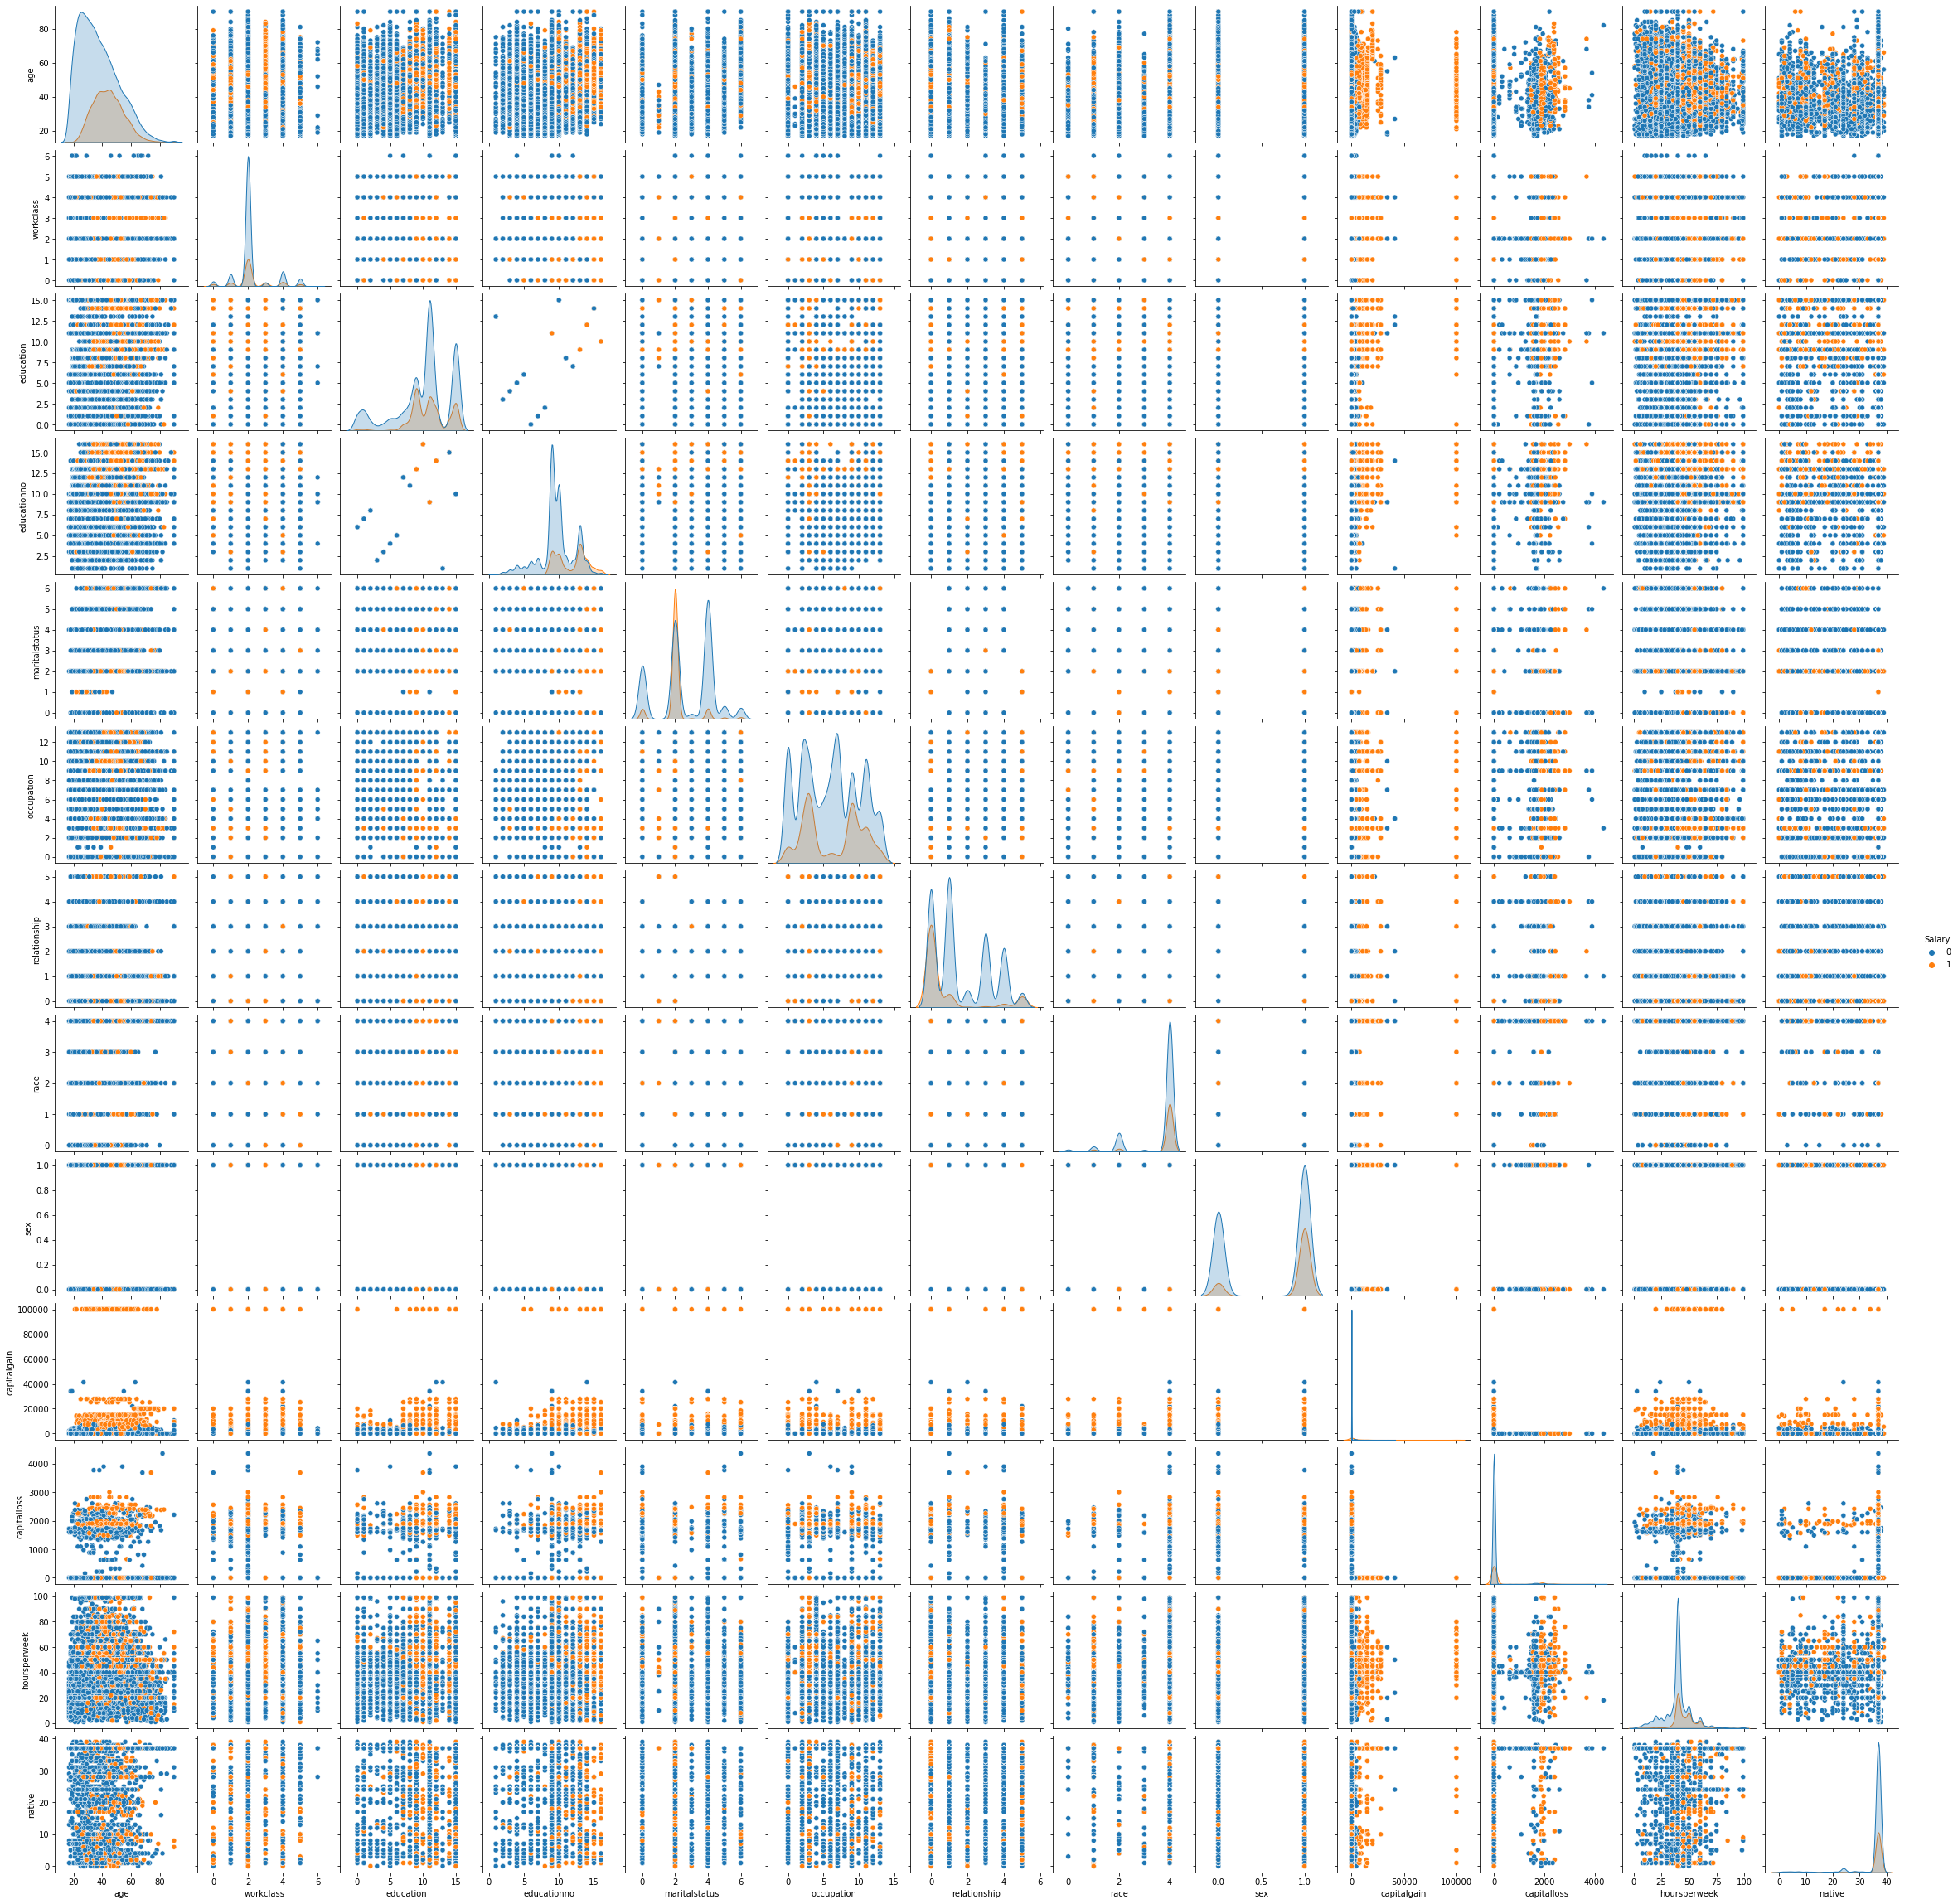

In [9]:
sns.pairplot(salary_train, hue='Salary')

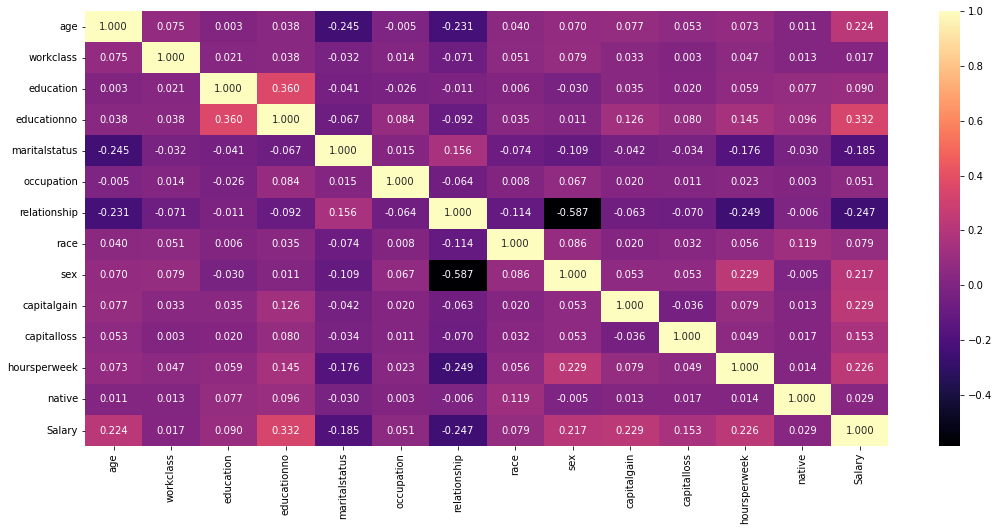

In [10]:
plt.figure(figsize = (18, 8));
sns.heatmap(salary_train.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

### Test Dataset:

In [11]:
s2_test = pd.read_csv('SalaryData_Test(1).csv')
s2_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [12]:
salary_test = s2_test.drop_duplicates()
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


#### Label Encoding

In [13]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
salary_test['workclass']= label_encoder.fit_transform(salary_test['workclass']) 
salary_test['education']= label_encoder.fit_transform(salary_test['education'])
salary_test['maritalstatus']= label_encoder.fit_transform(salary_test['maritalstatus'])
salary_test['occupation']= label_encoder.fit_transform(salary_test['occupation'])
salary_test['relationship']= label_encoder.fit_transform(salary_test['relationship'])
salary_test['race']= label_encoder.fit_transform(salary_test['race'])
salary_test['sex']= label_encoder.fit_transform(salary_test['sex'])
salary_test['native']= label_encoder.fit_transform(salary_test['native'])
salary_test['Salary']= label_encoder.fit_transform(salary_test['Salary'])

In [14]:
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [15]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14130 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            14130 non-null  int64
 1   workclass      14130 non-null  int32
 2   education      14130 non-null  int32
 3   educationno    14130 non-null  int64
 4   maritalstatus  14130 non-null  int32
 5   occupation     14130 non-null  int32
 6   relationship   14130 non-null  int32
 7   race           14130 non-null  int32
 8   sex            14130 non-null  int32
 9   capitalgain    14130 non-null  int64
 10  capitalloss    14130 non-null  int64
 11  hoursperweek   14130 non-null  int64
 12  native         14130 non-null  int32
 13  Salary         14130 non-null  int32
dtypes: int32(9), int64(5)
memory usage: 1.1 MB


In [16]:
salary_test.shape

(14130, 14)

In [17]:
salary_test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
sns.pairplot(salary_test, hue='Salary')

In [ ]:
plt.figure(figsize = (21, 7));
sns.heatmap(salary_test.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

#### Applying Train and Test split on Salary Dataset:

In [ ]:
x_train = salary_train.iloc[:,0:13]
y_train = salary_train.iloc[:,-1]   #last column is -1

In [ ]:
x_test = salary_test.iloc[:,0:13]
y_test = salary_test.iloc[:,-1]

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

### Using SVC :

#### 1) kernal = rbf

In [ ]:
model_rbf = SVC(kernel = 'rbf')
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, pred_test_rbf))(y_test, y_pred) 

In [ ]:
confusion_matrix(y_test, pred_test_rbf)

#### 2) kernal = linear

In [ ]:
model_linear = SVC(kernel = 'linear')
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy:", accuracy_score(y_test, pred_test_linear))

In [ ]:
confusion_matrix(y_test, pred_test_linear)

#### 3) kernal = poly

In [ ]:
model_poly = SVC(kernel = 'poly')
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)
print("Accuracy:", accuracy_score(y_test, pred_test_poly))

In [ ]:
confusion_matrix(y_test, pred_test_poly)

#### 4) kernal = sigmoid

In [ ]:
model_sigmoid = SVC(kernel = 'sigmoid')
model_sigmoid.fit(x_train,y_train)
pred_test_sigmoid = model_sigmoid.predict(x_test)
print("Accuracy:", accuracy_score(y_test, pred_test_sigmoid))

In [ ]:
confusion_matrix(y_test, pred_test_sigmoid)

#### Using Grid Search CV :

#### 1) kernal = rbf

In [ ]:
class1 = SVC()
param_grid1 = [{'kernel':['rbf'], 'gamma': [50,5,0.5], 'C':[15,12,7,3,0.1,0.0001]}]
gscv1 = GridSearchCV(class1,param_grid1,cv=10)
gscv1.fit(x_train, y_train)

In [ ]:
gscv1.best_params_, gscv1.best_score_

In [ ]:
c1 = SVC(C=15, gamma = 0.5)
c1.fit(x_train, y_train)
y_pred1 = c1.predict(x_test) 
acc1 = accuracy_score(y_test, y_pred1)*100
print("Accuracy:", acc1)

#### 2) kernal = linear

In [ ]:
class2 = SVC()
param_grid2 = [{'kernel':['linear'], 'gamma': [40,5,0.5], 'C':[15,11,7,2,0.1,0.0001]}]
gscv2 = GridSearchCV(class2,param_grid2,cv=10)
gscv2.fit(x_train, y_train)

In [ ]:
gscv2.best_params_, gscv2.best_score_

In [ ]:
c2 = SVC(C=11, gamma = 0.5)
c2.fit(x_train, y_train)
y_pred2 = c2.predict(x_test) 
acc2 = accuracy_score(y_test, y_pred2)*100
print("Accuracy:", acc2)

#### 3) kernal = poly

In [ ]:
class3 = SVC()
param_grid3 = [{'kernel':['poly'], 'gamma': [45,5,0.5,0.1], 'C':[15,10,5,3,0.1,0.0001]}]
gscv3 = GridSearchCV(class3,param_grid3,cv=10)
gscv3.fit(x_train, y_train)

In [ ]:
gscv3.best_params_, gscv3.best_score_

In [ ]:
c3 = SVC(C=15, gamma = 0.1)
c3.fit(x_train, y_train)
y_pred3 = c3.predict(x_test) 
acc3 = accuracy_score(y_test, y_pred3)*100
print("Accuracy:", acc3)

#### 4) kernal = sigmoid

In [ ]:
class4 = SVC()
param_grid4 = [{'kernel':['sigmoid'], 'gamma': [50,5,0.5], 'C':[15,12,7,0.1,0.0001]}]
gscv4 = GridSearchCV(class4,param_grid4,cv=10)
gscv4.fit(x_train, y_train)

In [ ]:
gscv4.best_params_, gscv4.best_score_

In [ ]:
c4 = SVC(C=15, gamma = 0.5)
c4.fit(x_train, y_train)
y_pred4 = c4.predict(x_test) 
acc4 = accuracy_score(y_test, y_pred4)*100
print("Accuracy:", acc4)